In [ ]:
#Importing all important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Reading the data 
url="http://bit.ly/w-data"
data=pd.read_csv(url)
data.head(12).T


,0,1,2,3,4,5,6,7,8,9,10,11
Hours,2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9
Scores,21.0,47.0,27.0,75.0,30.0,20.0,88.0,60.0,81.0,25.0,85.0,62.0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [ ]:
#checking the missing value in dataset 
data.isna().sum()

Hours     0
Scores    0
dtype: int64

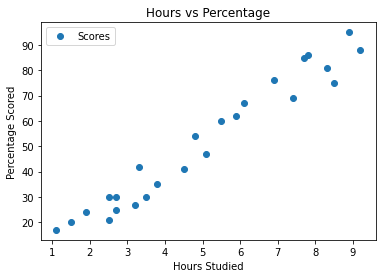

In [ ]:
#Plotting the data 
data.plot(x='Hours', y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**


In [ ]:
#Preparing the Data set or Locking the Data set
X = data.iloc[:, :-1].values


In [ ]:
Y = data.iloc[:, 1].values

#  Now Spliting  the record for trainining and testing
      1.check the shape of xtrain ,xtest
      2.check the shape of ytrain,ytest

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.25,random_state=0)

In [ ]:
print('Xtrain=',Xtrain.shape)
print('Xtest=',Xtest.shape)
print('Ytrain=',Ytrain.shape)
print('Ytest=',Ytest.shape)

Xtrain= (18, 1)
Xtest= (7, 1)
Ytrain= (18,)
Ytest= (7,)


In [ ]:
#Building  Linear Regression Model
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

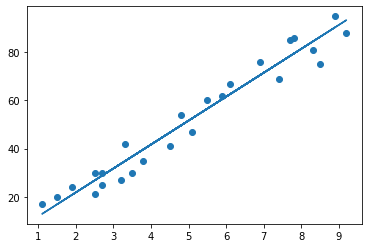

In [ ]:
#plotting the reg line

# Plotting the regression line
line = lin_reg.coef_*X+lin_reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [ ]:
print(Xtest) #Testing data in Hours 
Ypred= lin_reg.predict(Xtest)  #Predicting the model


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [ ]:
print(Ypred)

[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


In [ ]:
#Comparing the Actual vs Predicted
df = pd.DataFrame({"Actual":Ytest ,
                   "Predicted":Ypred})
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [ ]:
#Testing with our  own data
lr_pred=lin_reg.predict(np.array([[9.25]])) #in hours
print("Predicted Score :",lr_pred)

Predicted Score : [93.89272889]


In [ ]:
#Performance Evaluation

from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Ytest, Ypred)) 

Mean Absolute Error: 4.130879918502482


In [ ]:
from sklearn.metrics  import mean_squared_error,r2_score,explained_variance_score 
print('R Square_score is:',r2_score(Ytest,Ypred))
print('mean_squared_error (MSE) is :',mean_squared_error(Ytest,Ypred))
print('Explained variance betwn actual and error is:',explained_variance_score(Ytest,Ypred))
print('RMSE is :',np.sqrt(mean_squared_error(Ytest,Ypred)))

R Square_score is: 0.9367661043365056
mean_squared_error (MSE) is : 20.33292367497996
Explained variance betwn actual and error is: 0.9398737229250632
RMSE is : 4.509204328368805


In [ ]:
# here R Square Score is 0.93 that is 93% so our model is good.